# Data Analisys 1: Non sono solo cartoni...
Il mondo dell'animazione non è solo fatto di colori vivaci e personaggi immaginari, ma anche di un'imponente produzione artistica e culturale che ha avuto un impatto significativo nell'industria cinematografica. Attraverso questo studio, esploreremo come i film di animazione, come Toy Story e altri vincitori di premi prestigiosi, abbiano influenzato la storia del cinema. Esamineremo dati riguardanti la produzione, le recensioni, i premi e l'evoluzione del genere, dimostrando che l'animazione è molto più di un semplice intrattenimento per bambini. In questo viaggio, scopriremo come questi film abbiano definito nuovi standard artistici, tecnici ed economici, spingendo i confini del possibile e lasciando un segno indelebile nella cultura popolare.

Prima di ogni cosa, importiamo le tabelle che dovremmo usare per il nostro lavoro di analisi.

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [74]:
# Ottiene la directory di lavoro corrente
script_dir = os.getcwd()

# Cartella dove si trovano i file CSV (modifica con il percorso corretto)
clean_path = os.path.join(script_dir, "Data", "clean_data")

# Caricamento dei dataset con percorsi dinamici
actors = pd.read_csv(os.path.join(clean_path, "actors_cleaned.csv"))
countries = pd.read_csv(os.path.join(clean_path, "countries_cleaned.csv"))
crew = pd.read_csv(os.path.join(clean_path, "crew_cleaned.csv"))
genres = pd.read_csv(os.path.join(clean_path, "genres_cleaned.csv"))
languages = pd.read_csv(os.path.join(clean_path, "languages_cleaned.csv"))
movies = pd.read_csv(os.path.join(clean_path, "movies_cleaned.csv"))
posters = pd.read_csv(os.path.join(clean_path, "posters_cleaned.csv"))
releases = pd.read_csv(os.path.join(clean_path, "releases_cleaned.csv"))
studios = pd.read_csv(os.path.join(clean_path, "studios_cleaned.csv"))
themes = pd.read_csv(os.path.join(clean_path, "themes_cleaned.csv"))
oscar_awards = pd.read_csv(os.path.join(clean_path, "the_oscar_awards_cleaned.csv"))
rotten_tomatoes = pd.read_csv(os.path.join(clean_path, "rotten_tomatoes_reviews_cleaned.csv"))
print("File pronti per essere analizzati!")

File pronti per essere analizzati!


Il cinema di animazione ha una storia affascinante e in continua evoluzione, nata dalla sperimentazione artistica e tecnologica e divenuta un pilastro fondamentale dell’intrattenimento globale. Con l'avvento del sonoro e del colore, il settore ha visto l'ascesa di Walt Disney, che con Steamboat Willie (1928) e poi con Biancaneve e i sette nani (1937) ha rivoluzionato l'industria, trasformando l’animazione in una forma d’arte popolare e accessibile a tutti.

Parallelamente, studi come Warner Bros., con i Looney Tunes di Tex Avery e Chuck Jones, hanno introdotto un'animazione più dinamica e comica, mentre in Giappone Osamu Tezuka ha gettato le basi per l'animazione giapponese moderna, influenzando i futuri capolavori dello Studio Ghibli di Hayao Miyazaki e Isao Takahata. L’animazione stop-motion ha visto maestri come Ray Harryhausen e, più recentemente, la Aardman Animations con Wallace & Gromit.

Con l’avvento del digitale, Pixar ha rivoluzionato il settore con Toy Story (1995), il primo lungometraggio interamente in CGI, aprendo la strada a nuove possibilità espressive. Oggi il cinema di animazione è una realtà multiforme e globale, che spazia dalla sperimentazione indipendente ai blockbuster targati Disney, DreamWorks e anime giapponesi, continuando a stupire e a innovare il linguaggio cinematografico. 

Vediamo assieme i grandi protagonisti di questo genere con un grafico indicativo delle vittorie agli Oscar, più ambito premio cinematografico, delle grandi case di produzione animata per i loro capolavori:

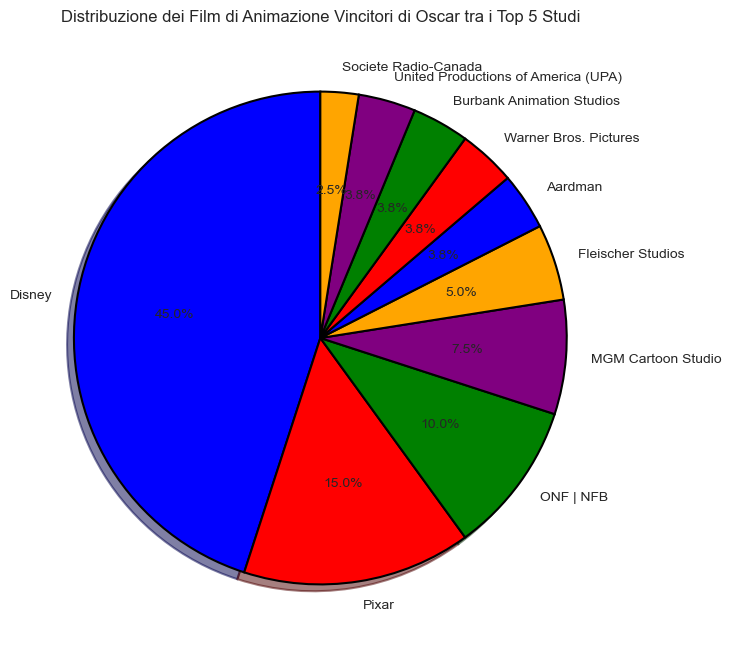

In [65]:
# Filtrare i film vincitori di Oscar
oscar_winners = oscar_awards[oscar_awards["winner"] == True]

# Unire i dati per ottenere i generi e gli studi di produzione
merged_df = oscar_winners.merge(movies, left_on="film", right_on="name", how="inner")
merged_df = merged_df.merge(genres, left_on="id", right_on="id", how="inner")
merged_df = merged_df.merge(studios, left_on="id", right_on="id", how="inner")

# Filtrare solo i film di animazione
animation_winners = merged_df[merged_df["genre"].str.lower() == "animation"]

# Rimuovere duplicati per evitare conteggi doppi nelle coproduzioni
animation_winners = animation_winners.drop_duplicates(subset=["film"])

# Normalizzare i nomi degli studi per accorpare quelli contenenti "Disney"
animation_winners["studio"] = animation_winners["studio"].apply(lambda x: "Disney" if "disney" in str(x).lower() else x)

# Contare il numero di film vincitori per studio
studio_counts = animation_winners.groupby("studio")["film"].nunique().reset_index()
studio_counts = studio_counts.sort_values(by="film", ascending=False)

# Prendere i primi 5 studi
top_5_studios = studio_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_5_studios["film"], labels=top_5_studios["studio"], autopct='%1.1f%%', 
        colors=['blue', 'red', 'green', 'purple', 'orange'], startangle=90, shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title("Distribuzione dei Film di Animazione Vincitori di Oscar tra i Top 5 Studi")
plt.show()


Al contrario di quanto si possa pensare, per quanto sia un settore di nicchia, non è relegato al solo mondo dell'intrattenimento infantile. A supporto della mia tesi ecco un dato interessante: la correlazione tra film di animazione e il genere cui appartengono, che visualizziamo di seguito.

Come si può notare infatti, per quanto il genere comico abbia uno strapotere non indifferente, sono sull'ordine delle migliaia le serie animate o film che toccano generi ben lontani da quelli che concernono i gusti dei bambini, con un particolare occhio a quella che è la situazione di Drama e Horror.

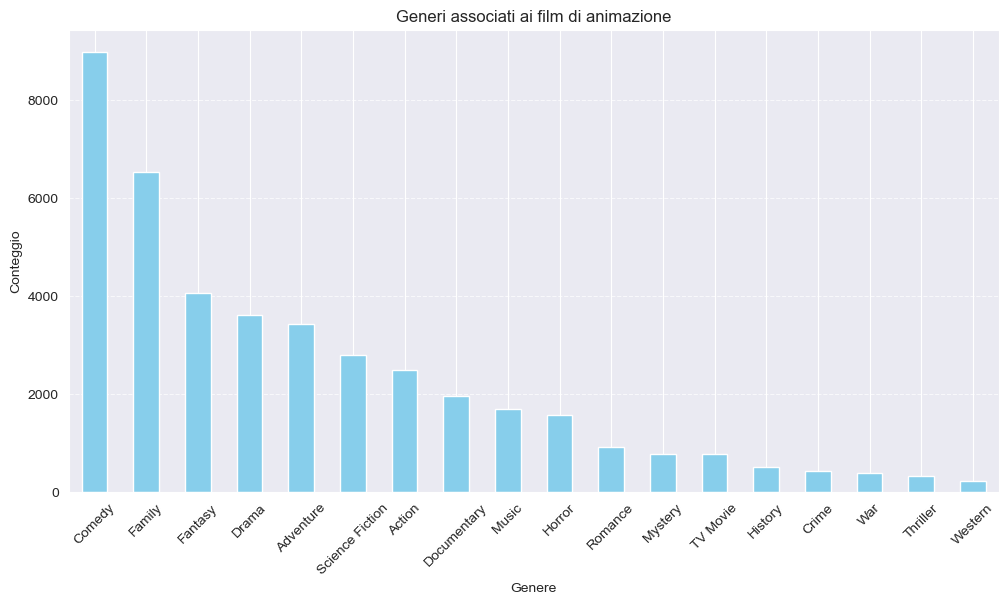

In [68]:
# Unire le tabelle per ottenere i film di animazione
animation_movies = genres[genres['genre'].str.lower() == 'animation']
merged = animation_movies.merge(movies, on='id')

# Contare la frequenza dei generi associati ai film di animazione (escludendo "Animation")
genre_counts = genres[genres['id'].isin(merged['id']) & (genres['genre'].str.lower() != 'animation')]['genre'].value_counts()

# Creare il grafico
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Generi associati ai film di animazione")
plt.xlabel("Genere")
plt.ylabel("Conteggio")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Pixar
La Pixar Animation Studios è una delle case di produzione cinematografica più influenti della storia dell’animazione, nota per aver rivoluzionato il settore con l’introduzione della grafica computerizzata nei film d’animazione.

Le radici della Pixar affondano nel 1979, quando la divisione di grafica computerizzata della Lucasfilm, nota come Graphics Group, iniziò a sviluppare nuove tecnologie per la creazione di immagini digitali. Nel 1986, Steve Jobs acquistò questa divisione per 10 milioni di dollari, trasformandola in Pixar Inc. e guidandola verso il mondo dell’animazione digitale. Sotto la guida di Ed Catmull e John Lasseter, lo studio si dedicò alla creazione di cortometraggi sperimentali, tra cui Luxo Jr. (1986), il corto che introdusse la famosa lampada animata, diventata il simbolo della Pixar.

Nel 1995, dopo anni di sviluppo, la Pixar realizzò il primo lungometraggio interamente in CGI della storia: Toy Story. Il film, distribuito dalla Disney, fu un successo straordinario, sia dal punto di vista commerciale che critico, segnando l’inizio di una nuova era per l’animazione. Di seguito, la risposta del pubblico a questo film, che ancora oggi è molto apprezzato:

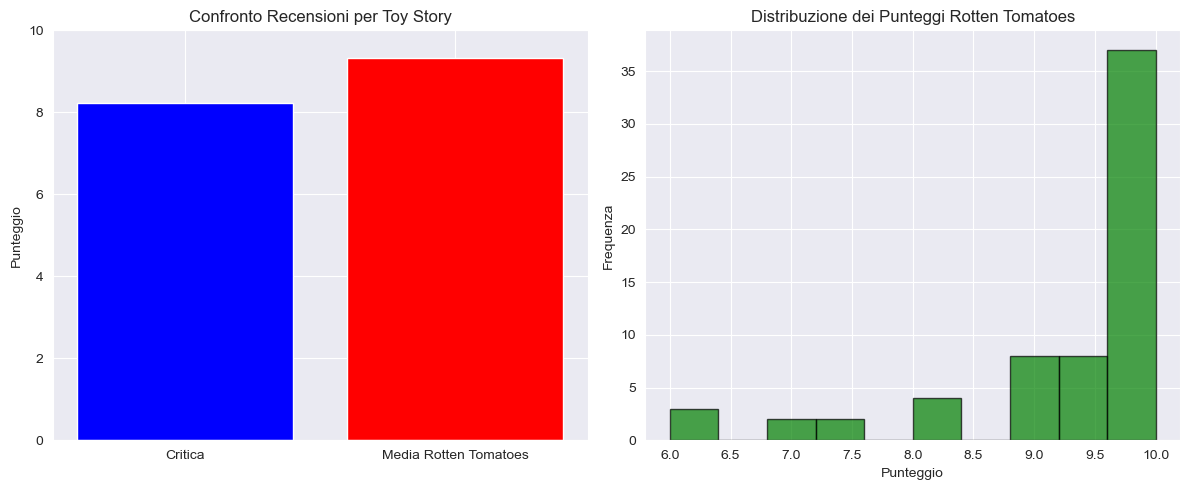

Rating critica per Toy Story: 8.24
Media recensioni Rotten Tomatoes per Toy Story: 9.31875


In [69]:
# Isolare il rating del film "Toy Story" dalla tabella movies
toy_story_rating = movies[movies["name"] == "Toy Story"]["rating"].values

# Isolare le recensioni di "Toy Story" dalla tabella rotten_tomatoes
toy_story_reviews = rotten_tomatoes[rotten_tomatoes["movie_title"] == "Toy Story"]["review_score"]

# Calcolare la media delle recensioni
toy_story_avg_review = toy_story_reviews.mean()

# Creare il grafico di confronto
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

labels = ["Critica", "Media Rotten Tomatoes"]
values = [toy_story_rating[0]*2 if len(toy_story_rating) > 0 else 0, toy_story_avg_review]

axes[0].bar(labels, values, color=['blue', 'red'])
axes[0].set_ylabel("Punteggio")
axes[0].set_title("Confronto Recensioni per Toy Story")
axes[0].set_ylim(0, 10)

# Creare il grafico della distribuzione delle recensioni Rotten Tomatoes
axes[1].hist(toy_story_reviews, bins=10, color='green', edgecolor='black', alpha=0.7)
axes[1].set_xlabel("Punteggio")
axes[1].set_ylabel("Frequenza")
axes[1].set_title("Distribuzione dei Punteggi Rotten Tomatoes")

plt.tight_layout()
plt.show()

# Stampare i risultati
print(f"Rating critica per Toy Story: {toy_story_rating[0]*2 if len(toy_story_rating) > 0 else 'N/A'}")
print(f"Media recensioni Rotten Tomatoes per Toy Story: {toy_story_avg_review}")

Non è un unicum nella storia della Pixar questa situazione: il numero di film con altissime recensioni su Rotten Tomatoes (ma anche con ottime valutazioni date dalla critica) è infatti grandissimo, come riportato di seguito. Inoltre evidenziamo i migliori dieci film per valutazioni del pubblico e i peggiori dieci, con particolare attenzione a questi ultimi.

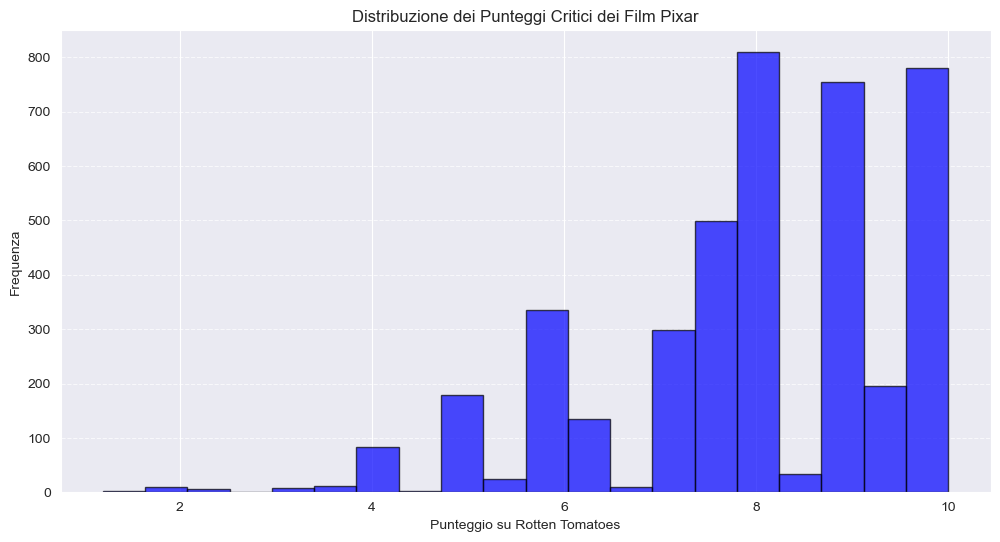

In [83]:
# Filtrare i film della Pixar
pixar_movies = movies.merge(studios, left_on="id", right_on="id", how="inner")
pixar_movies = pixar_movies[pixar_movies["studio"].str.contains("Pixar", case=False, na=False)]

# Assicurarsi che la colonna 'date' sia stringa prima di estrarre l'anno
pixar_movies["date"] = pixar_movies["date"].astype(str)
pixar_movies["year"] = pixar_movies["date"].str[:4].astype(int)

# Unire i dati con le valutazioni di Rotten Tomatoes
pixar_ratings = rotten_tomatoes.merge(pixar_movies, left_on="movie_title", right_on="name", how="inner")

# Calcolare il punteggio medio per ogni film
pixar_avg_ratings = pixar_ratings.groupby(['year', 'name'])['review_score'].mean().reset_index()

# Creare l'istogramma
plt.figure(figsize=(12, 6))
plt.hist(pixar_ratings['review_score'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Punteggio su Rotten Tomatoes")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Punteggi Critici dei Film Pixar")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


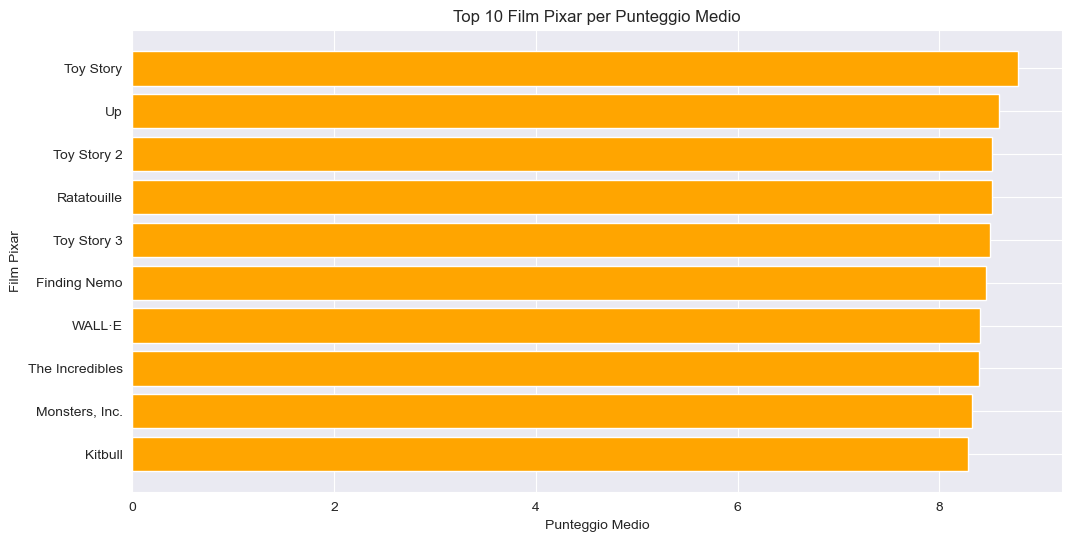

In [84]:
# Calcolare il punteggio medio su Rotten Tomatoes
rt_scores = rotten_tomatoes.groupby('movie_title')['review_score'].mean().reset_index()
rt_scores.rename(columns={'review_score': 'rt_avg_score'}, inplace=True)

# Normalizzare le scale dei punteggi
pixar_movies['rating'] = pixar_movies['rating'] * 2  # Portare la scala 1-5 a 1-10

# Unire i punteggi con i film Pixar
pixar_movies = pixar_movies.merge(rt_scores, left_on='name', right_on='movie_title', how='left')

# Calcolare la media tra il voto del film e il punteggio medio di Rotten Tomatoes
pixar_movies['combined_score'] = pixar_movies[['rating', 'rt_avg_score']].mean(axis=1, skipna=True)

# Ordinare per punteggio e mostrare i migliori
best_pixar_movies = pixar_movies[['name', 'combined_score']].sort_values(by='combined_score', ascending=False).head(10)

# Creare il grafico dei migliori film Pixar
plt.figure(figsize=(12, 6))
plt.barh(best_pixar_movies['name'], best_pixar_movies['combined_score'], color='orange')
plt.xlabel("Punteggio Medio")
plt.ylabel("Film Pixar")
plt.title("Top 10 Film Pixar per Punteggio Medio")
plt.gca().invert_yaxis()
plt.show()


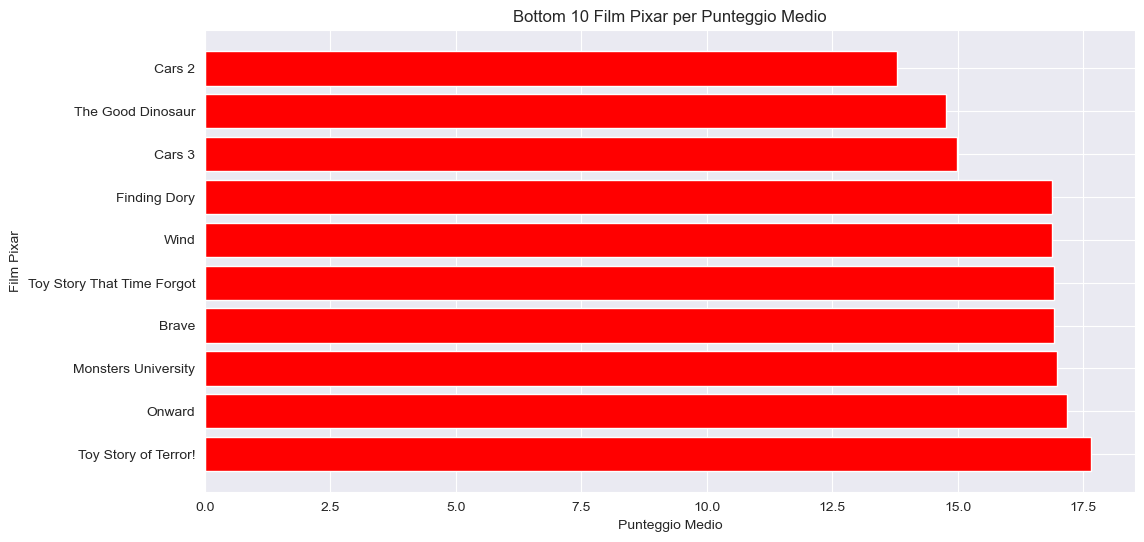

In [90]:
# Calcolare la media tra il voto del film e il punteggio medio di Rotten Tomatoes
pixar_movies['combined_score'] = pixar_movies[['rating', 'rt_avg_score']].mean(axis=1, skipna=True)

# Ordinare per punteggio e mostrare i peggiori
worst_pixar_movies = pixar_movies[['name', 'combined_score', 'minute']].sort_values(by='combined_score', ascending=True).head(10)

# Creare il grafico dei peggiori film Pixar
plt.figure(figsize=(12, 6))
plt.barh(worst_pixar_movies['name'], worst_pixar_movies['combined_score'], color='red')
plt.xlabel("Punteggio Medio")
plt.ylabel("Film Pixar")
plt.title("Bottom 10 Film Pixar per Punteggio Medio")
plt.gca().invert_yaxis()
plt.show()

Arriviamo ora ai film peggiori, che sono accomuniti tutti quanti da un dato interessante: sono tutti quanti cortometraggi, ma un altro dato interessante riguarda la tipologia di film: per la maggior parte sono puntate spin-off di grandi classici ("Hiccups" lo è di "Cars") tutti creati per puro fan service, di conseguenza vanno ad intaccare meno la grande produzione della Pixar. Oltre a questo, importante è notare che le valutazioni non sono davvero molto negative, di conseguenza questo è un grande valore aggiunto.

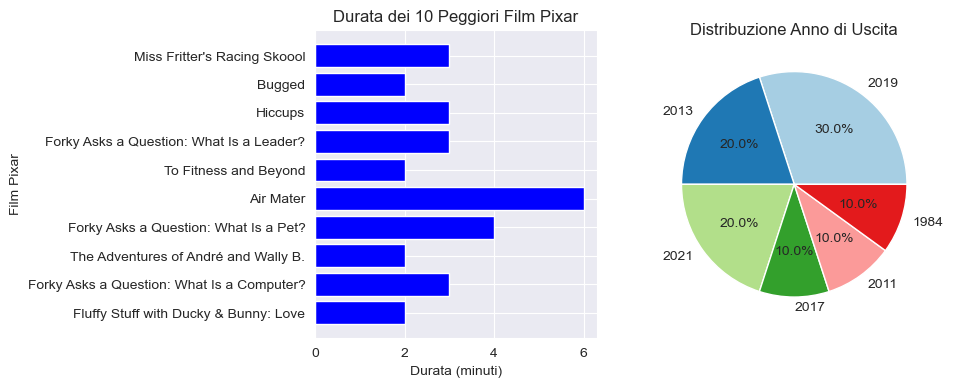

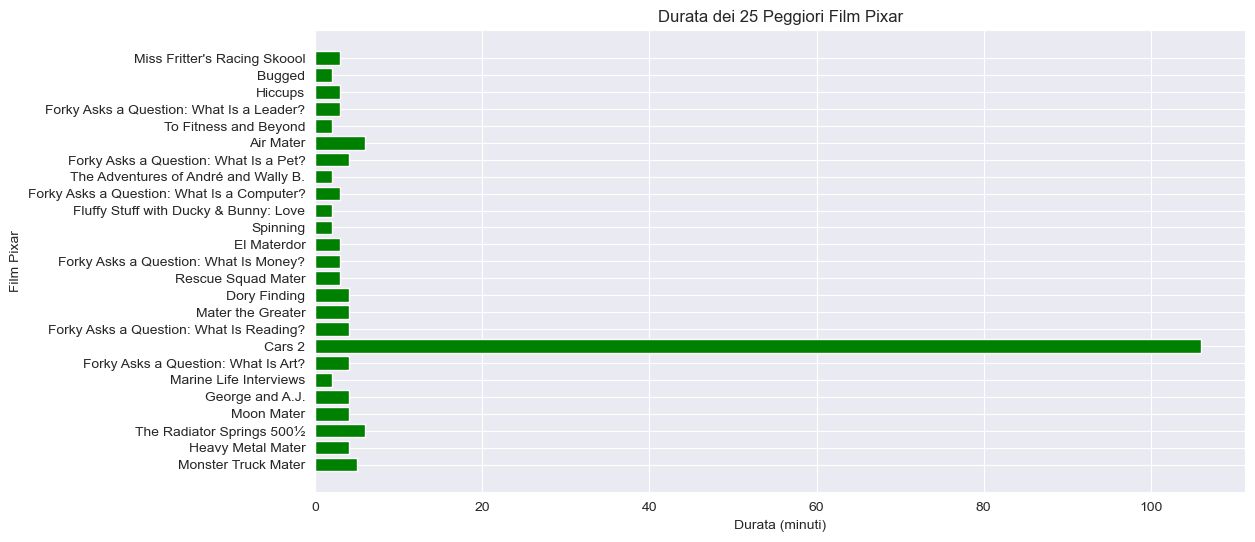

In [81]:
# Ordinare per punteggio e mostrare i peggiori
worst_pixar_movies_10 = pixar_movies[['name', 'combined_score', 'minute', 'date']].sort_values(by='combined_score', ascending=True).head(10)

worst_pixar_movies_25 = pixar_movies[['name', 'combined_score', 'minute', 'date']].sort_values(by='combined_score', ascending=True).head(25)

# Stampare i dati relativi all'anno di uscita
year_counts = worst_pixar_movies_10['date'].value_counts()

# Creare la figura con due sottografi affiancati
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Grafico a barre per la durata dei 10 peggiori film Pixar
axes[0].barh(worst_pixar_movies_10['name'], worst_pixar_movies_10['minute'], color='blue')
axes[0].set_xlabel("Durata (minuti)")
axes[0].set_ylabel("Film Pixar")
axes[0].set_title("Durata dei 10 Peggiori Film Pixar")
axes[0].invert_yaxis()  # Inverti l'asse y per leggibilità

# Grafico a torta per l'anno di uscita dei peggiori film Pixar
axes[1].pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[1].set_title("Distribuzione Anno di Uscita")

# Creare il grafico per la durata dei peggiori film Pixar
plt.figure(figsize=(12, 6))
plt.barh(worst_pixar_movies_25['name'], worst_pixar_movies_25['minute'], color='green')
plt.xlabel("Durata (minuti)")
plt.ylabel("Film Pixar")
plt.title("Durata dei 25 Peggiori Film Pixar")
plt.gca().invert_yaxis()
plt.show()
